In [43]:
# все нужные библиотеки
# можете дополнить список если считаете нужным
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from statsmodels.regression.linear_model import OLS

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb

import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns


### Проект:
Заказчик передал вам данные: суммы транзакции клиентов и какие-то признаки<br>
Все данные хранятся в файле train_dataset.csv, где суммы транзакций размещены под колонкой "int_target". Как вы уже догадались это и будет таргет который нам нужно будет предсказать.<br>
Не терпится начать? Мне тоже, но для начала вводная касательно этого проекта, тоже будет интересно.

Хотя перед вами стоит одна задача весь проект будет поделён на несколько подпунктов для вашего удобства.<br>
Каждый из подпунктов будет просить вас выполнить какое-то задание, но как вы его выполните будет зависеть только от вас. Ведь как вы уже
убедились в дата-саинсе, да и в целом питоне много разных подходов для одной проблемы.<br>

В целом вы можете написать полностью свой код, главное в итоге построить модель. А убедиться в том что ваша модель хороша нам поможет Kaggle.<br>
Да-да, в этом проекте вы сможете сдать свои результаты в Kaggle и получить свой балл.<br>
Ну, а теперь пора начинать

1) Для начала импортируйте данные из файла dataset.csv, назовите ваш датасет "dataset"

In [44]:
dataset = pd.read_csv('train_dataset.csv')

2. Сделайте предварительный анализ посмотрите на ваши данные:
сколько их, какого они типа, и какое их примерно распределение

In [45]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   9000 non-null   float64
 1   feature_2   9000 non-null   float64
 2   feature_3   9000 non-null   float64
 3   feature_4   9000 non-null   float64
 4   feature_5   9000 non-null   float64
 5   feature_6   9000 non-null   float64
 6   feature_7   9000 non-null   float64
 7   feature_8   9000 non-null   float64
 8   feature_9   9000 non-null   float64
 9   feature_10  9000 non-null   float64
 10  feature_11  9000 non-null   float64
 11  feature_12  9000 non-null   object 
 12  feature_13  9000 non-null   float64
 13  feature_14  9000 non-null   float64
 14  feature_15  9000 non-null   float64
 15  feature_16  9000 non-null   float64
 16  feature_17  9000 non-null   float64
 17  feature_18  9000 non-null   float64
 18  feature_19  9000 non-null   float64
 19  feature_20  9000 non-null  

In [46]:
dataset.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,int_target
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,9.892699,0.051539,13.691801,-5.280291,-0.190470,33.328407,353.997548,0.322612,-69.936887,-0.334325,0.328602,99.738087,99.862703,99.764452,99.958384,100.053203,100.209235,100.150711,99.819907,14962.016000
std,16.005016,0.708241,77.058634,26.814772,0.966878,193.282240,482.976481,1.928390,130.805512,1.802465,1.949699,19.970516,20.059934,19.816391,20.073887,20.005191,19.839667,20.084744,20.072153,8507.039575
min,-55.674815,-1.000000,0.002306,-90.266818,-1.000000,-782.730110,0.000032,-8.785694,-562.750841,-6.678488,-6.817115,23.296434,21.404151,20.462943,31.695377,25.278459,6.108243,29.523073,28.591199,501.000000
25%,-0.590266,-0.652740,0.891789,-24.131903,-1.000000,-88.607265,38.261808,-0.867972,-155.988559,-1.569338,-0.997933,86.416262,86.377084,86.184816,86.146061,86.513425,86.753705,86.684625,86.163540,7461.750000
50%,10.032527,0.108589,2.771781,-6.535842,-0.999996,47.154805,169.202144,0.454511,-80.249681,-0.374527,0.361400,99.753333,99.914720,99.938163,99.956294,99.644334,100.166669,100.179503,99.942090,14878.500000
75%,20.577624,0.750147,8.313018,12.151035,1.000000,165.882796,476.800547,1.636826,10.046369,0.874218,1.690059,113.192601,113.550065,113.274773,113.503300,113.486201,113.389489,113.657307,113.275163,22404.000000
max,71.408515,1.000000,4195.458665,96.967006,1.000000,689.183091,5099.175987,7.563691,454.622574,6.605742,7.314190,169.972815,169.211534,176.896232,180.756967,182.022092,173.917343,171.521586,178.220128,29631.000000


In [47]:
print(dataset['int_target'].value_counts())

int_target
9993     4
14639    4
15784    4
4015     4
18511    4
        ..
27943    1
7348     1
12983    1
7528     1
11100    1
Name: count, Length: 7738, dtype: int64


3. Разделите ваш датасет на таргет и признаки, а также поделите ваш датасет на тренировочный и тестовый

In [48]:
X = dataset.drop(columns=['int_target'])  
y = dataset['int_target']  

4. Надеюсь вы заметили что у вас есть категориальный признак который имеет текстовый формат.<br>
Переведите этот признак в числовое значение

In [49]:
X_encoded = pd.get_dummies(X, columns=['feature_12'])
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=105)

In [50]:
X_encoded.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_12_A,feature_12_B,feature_12_C,feature_12_D
0,-0.043457,-0.027918,1.473594,-10.309556,-1.000000,145.373247,0.001888,2.555947,-64.208613,0.470329,...,120.550153,59.736520,64.325558,107.833753,85.853573,104.466108,False,True,False,False
1,-1.535978,0.999851,23.019753,38.430092,1.000000,-110.045207,2.359228,0.571917,-110.318854,-2.620978,...,68.505986,116.330797,75.365722,104.229006,90.842232,95.232654,False,False,False,True
2,11.567708,0.608310,1.873323,6.412821,0.999995,-280.186852,133.811870,1.160380,-206.238816,-1.006502,...,64.417992,98.846694,66.381070,82.118547,96.837671,103.887599,False,True,False,False
3,9.220074,0.999864,5.041939,-12.692120,-1.000000,164.773793,85.009772,-1.401234,92.624296,2.712139,...,120.176496,104.297092,89.318362,73.791588,71.870016,68.397346,False,False,True,False
4,-3.025434,-0.594711,5.912259,-14.922129,-1.000000,9.546673,9.153251,-0.157479,-175.895074,-0.832795,...,75.458961,111.831234,111.871202,99.733563,100.697358,97.568328,False,False,True,False


5. Надеюсь вы заметили что масштабы наших признаков сильно разнятся.<br>
Давайте применим одно единое масштабирование на все наши признаки.

In [51]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

6. Постройте модель линейной регрессии.<br>
Оцените модель с помощью метрики RMSE, а также покажите статистические метрики

In [52]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [53]:
MSE(y_test, y_pred)**(1/2)

6760.374952900915

In [54]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.36151845744532307

### Апдейт задачи
Пришле заказчик и запросил текущий статус. Метрики RMSE ему сильно не понравились, около половины размаха всего таргета.<br>
Вы предпологаете, что задача регрессии слишком комплексна для текущего набора данных.<br>
Вы предложили, поделить таргет на классы, то есть не определять абсолютную сумму транзакций, а определять к какому классу этот клиент относится (высокодоходных, средний или низкодоходный).<br>
Заказчик показать как поделить на эти классы

7. Чтобы поделить таргет на классы давайте сначала посмотрим на распределение этого самого таргета

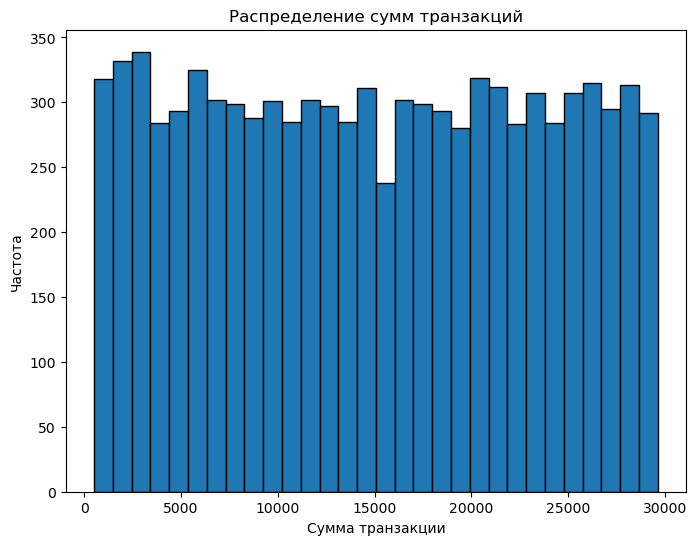

In [55]:
plt.figure(figsize=(8, 6))
plt.hist(y, bins=30, edgecolor='k')
plt.xlabel('Сумма транзакции')
plt.ylabel('Частота')
plt.title('Распределение сумм транзакций')
plt.show()

8. Думаю вы согласитесь что распределение выглядит равномерным то есть поделить мы можем на три равных класса.<br>
Для этого нам нужно посчитать соответствующие перцентили (33% и 67%)

In [56]:
percentile_33 = np.percentile(y, 33)
percentile_67 = np.percentile(y, 67)

In [57]:
print("33-й перцентиль:", percentile_33)
print("67-й перцентиль:", percentile_67)

33-й перцентиль: 9871.67
67-й перцентиль: 20120.66


9. Заказчик согласился на деление по классам по данным перцентире но предложил их округлить.<br>
Поэтому создайте новый таргет, по такой логике, все что ниже 10,000 это низкодоходный, а все что выше 20000 это высокодоходный, остальное соответсвенно средний класс

In [58]:
def income_class(income):
    if income < 10000:
        return 'Низкодоходный'
    elif income > 20000:
        return 'Высокодоходный'
    else:
        return 'Средний класс'
y_class = y.apply(income_class)
print(y_class)

0        Средний класс
1        Низкодоходный
2        Средний класс
3       Высокодоходный
4        Низкодоходный
             ...      
8995     Средний класс
8996    Высокодоходный
8997     Низкодоходный
8998    Высокодоходный
8999     Средний класс
Name: int_target, Length: 9000, dtype: object


10. Давайте теперь построим модель логистической регрессии она будет служить нам бэйзлайном, а также фильтром признаков.<br>
Для этого постройте модель с Lasso регуляризацией и коефициентом регуляризации 0.01.<br>
Оцените модель используя метрику accuracy

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_class, test_size=0.3, random_state=105)

In [60]:
model = LogisticRegression(penalty='l1', C=0.01, solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

In [61]:
y_pred = model.predict(X_test)

In [62]:
accuracy_score(y_test, y_pred)

0.7692592592592593

11. Посмотрите какие получились коэффициенты признаков у нашей модели

In [63]:
model.coef_, model.intercept_

(array([[ 4.66629125e-03,  7.25772353e-02,  7.80775721e-04,
         -1.62221491e-02,  0.00000000e+00, -8.88424585e-04,
         -7.14392894e-04, -2.51739524e-01,  5.59161287e-03,
          3.42916855e-01,  1.71500650e-01, -9.65807962e-04,
          2.36586089e-03, -2.26015209e-03, -1.28647883e-03,
          8.68072900e-04,  9.84777653e-04, -1.76713999e-03,
         -4.73716382e-05,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [ 3.55334007e-02, -2.58195878e-01, -4.04593525e-04,
          6.42571555e-02,  0.00000000e+00, -2.88926648e-04,
          4.87297358e-05, -2.24152572e-01, -8.36954865e-03,
          1.86224543e-01, -5.43328542e-01,  1.88761276e-04,
         -2.55564416e-03, -1.36039556e-03, -1.30053156e-03,
         -1.75797766e-03, -2.10411678e-03, -3.05416768e-03,
         -1.51818223e-03,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00],
        [-3.74656616e-02,  0.00000000e+00, -6.52678300e-04,
         -4.

12. Что ж видимо признаки у которых коэффициенты по всем классам равны нулю нам не особо полезны.<br>
Давайте выберем только те признаки у которых коэффициент не ноль и создадим новый датасет признаков

In [64]:
selected_features = X_encoded.columns[model.coef_[0] != 0]

new_dataset = X[selected_features]

print(new_dataset.head())

   feature_1  feature_2  feature_3  feature_4   feature_6   feature_7  \
0  -0.043457  -0.027918   1.473594 -10.309556  145.373247    0.001888   
1  -1.535978   0.999851  23.019753  38.430092 -110.045207    2.359228   
2  11.567708   0.608310   1.873323   6.412821 -280.186852  133.811870   
3   9.220074   0.999864   5.041939 -12.692120  164.773793   85.009772   
4  -3.025434  -0.594711   5.912259 -14.922129    9.546673    9.153251   

   feature_8   feature_9  feature_10  feature_11  feature_13  feature_14  \
0   2.555947  -64.208613    0.470329    0.525065   83.317907   85.385030   
1   0.571917 -110.318854   -2.620978   -0.910418  114.881621   79.711086   
2   1.160380 -206.238816   -1.006502   -1.598523  145.833459  115.159171   
3  -1.401234   92.624296    2.712139    3.248977   98.150579   78.620349   
4  -0.157479 -175.895074   -0.832795   -0.565688   94.519135  123.286154   

   feature_15  feature_16  feature_17  feature_18  feature_19  feature_20  
0  120.550153   59.736520   

In [65]:
print(selected_features)

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_6',
       'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11',
       'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17',
       'feature_18', 'feature_19', 'feature_20'],
      dtype='object')


13. Давайте посмотрим есть ли какая-то предсказательная способность у оставшихся признаков.<br>
Для этого примените principal component analysis и нарисуйте эти компоненты на графике с таргетом

In [66]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(new_dataset)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y_class.values

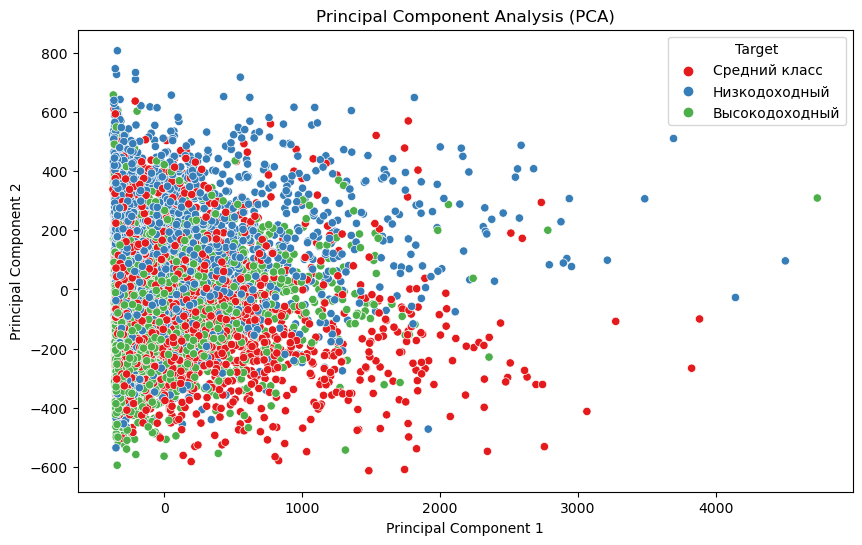

In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='target', palette='Set1')
plt.title('Principal Component Analysis (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Target', loc='best')
plt.show()

14. Видимо что-то есть в этих признаках.<br>
Давайте теперь попробуем построить более комплексную модель, постройте любую модель основную на деревьях.<br>
Так же оцените вашу модель с помощью метрики accuracy

In [68]:
X_train, X_test, y_train, y_test = train_test_split(new_dataset, y_class, test_size=0.3, random_state=105)

scaler.fit(X_train)
x_tr_scaled = scaler.transform(X_train)
x_t_scaled = scaler.transform(X_test)

tree_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 10, min_samples_leaf = 2, min_samples_split = 2) # GridSearchCV
tree_model.fit(x_tr_scaled, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2)

In [69]:
y_pred_tree = tree_model.predict(x_t_scaled)
accuracy_score(y_test, y_pred_tree)

0.7477777777777778

15. Давайте попробуем применить другой тип модели.<br>
Постройте SVM модель и оцените ее accuracy

In [70]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [71]:
y_pred_svm = svm_model.predict(X_test_scaled)

In [72]:
accuracy_score(y_test, y_pred_svm)

0.8174074074074074

15. Давайте попробуем применить другой тип модели.<br>
Постройте KNN модель и оцените ее accuracy

In [73]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [74]:
y_pred_knn = knn_model.predict(X_test_scaled)

In [75]:
accuracy_score(y_test, y_pred_knn)

0.7040740740740741

### Отправляем работы
Ну чтож думаю вы попробовали разные модели, надеюсь вы находили лучшие гиперпараметры, ведь пора соревноваться в результатах.<br>
Для этого вам нужно скачать 'test_dataset.csv'<br>
Применить все преобразования что вы делали на стадии обучения модели<br>
Выбрать вашу лучшую модель и сделать предсказания классов для этого датасета<br>
Внимание ваш результат должен быть csv файлом состоящим из двух колонок: ID (от 0 до 999) и cat_target (ваши прогнозы 0/1/2)
Отправить свои результаты вы можете на соревнование Kaggle по ссылке: https://www.kaggle.com/t/6fcb93642fe949aa9c6fb7875fb1b64e<br>


In [76]:
test_dataset = pd.read_csv('test_dataset.csv')

In [77]:
test_dataset.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
0,3.629075,0.817774,0.129687,6.219642,0.999992,-58.751555,13.170185,-2.265941,163.600359,-0.590149,1.724402,A,115.782973,102.383110,75.750290,82.670555,88.398872,78.034384,124.881643,130.904343
1,-23.283759,-0.086293,0.508258,-9.114238,-1.000000,39.000794,542.133433,3.903423,-35.206871,0.184453,0.352388,D,110.274900,82.267629,98.946475,93.449254,80.750636,70.362057,118.437830,88.459522
2,2.842355,-0.987547,1.525673,-10.430008,-1.000000,-92.206528,8.078982,0.329318,-180.770230,-0.204815,-0.648555,B,93.094432,91.407737,105.507571,135.199911,101.494074,105.644610,101.121831,93.372128
3,-22.069979,-0.158082,7.572780,3.447535,0.997977,-173.333256,487.083984,2.533396,-146.763360,-1.238702,-0.072297,B,137.142645,109.992174,80.176218,142.513692,127.017116,88.508838,118.327166,91.573769
4,-7.702941,0.421435,0.407912,-6.168170,-0.999991,84.132138,59.335303,-1.125035,153.894943,-0.039970,-2.440906,B,130.685865,92.336227,95.847169,114.405540,117.925669,115.024795,104.837486,115.718165


In [79]:
encoded = pd.get_dummies(test_dataset, columns=['feature_12'])
encoded.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_12_A,feature_12_B,feature_12_C,feature_12_D
0,3.629075,0.817774,0.129687,6.219642,0.999992,-58.751555,13.170185,-2.265941,163.600359,-0.590149,...,75.750290,82.670555,88.398872,78.034384,124.881643,130.904343,True,False,False,False
1,-23.283759,-0.086293,0.508258,-9.114238,-1.000000,39.000794,542.133433,3.903423,-35.206871,0.184453,...,98.946475,93.449254,80.750636,70.362057,118.437830,88.459522,False,False,False,True
2,2.842355,-0.987547,1.525673,-10.430008,-1.000000,-92.206528,8.078982,0.329318,-180.770230,-0.204815,...,105.507571,135.199911,101.494074,105.644610,101.121831,93.372128,False,True,False,False
3,-22.069979,-0.158082,7.572780,3.447535,0.997977,-173.333256,487.083984,2.533396,-146.763360,-1.238702,...,80.176218,142.513692,127.017116,88.508838,118.327166,91.573769,False,True,False,False
4,-7.702941,0.421435,0.407912,-6.168170,-0.999991,84.132138,59.335303,-1.125035,153.894943,-0.039970,...,95.847169,114.405540,117.925669,115.024795,104.837486,115.718165,False,True,False,False


In [80]:
scaled = scaler.fit_transform(encoded.drop(['feature_12_A', 'feature_12_B', 'feature_12_C', 'feature_12_D'], axis=1))
scaled = pd.DataFrame(scaled, columns = encoded.drop(['feature_12_A', 'feature_12_B', 'feature_12_C', 'feature_12_D'], axis=1).columns)

In [81]:
dataset = pd.concat([scaled, encoded[['feature_12_A', 'feature_12_B', 'feature_12_C', 'feature_12_D']]], axis=1)

In [102]:
predictions = svm_model.predict(dataset)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [103]:
map_dict = {'Высокодоходный': 2, 'Средний класс': 1, 'Низкодоходный': 0}

In [104]:
arr_numeric = np.where(predictions == 'Высокодоходный', 2, 
              np.where(predictions == 'Средний класс', 1, 
                       np.where(predictions == 'Низкодоходный', 0, predictions)))

In [105]:
results = pd.DataFrame({
    'ID': test_dataset.index,
    'cat_target': arr_numeric })
results.head()

,ID,cat_target
0,0,2
1,1,1
2,2,0
3,3,1
4,4,2


In [106]:
results.to_csv('path_to_save_predictions.csv', index=False)